### Cargar librerías 

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd

### Descargamos el dataset MNIST

In [2]:
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

### Visualizamos algunas imágenes
MNIST presenta 60.000 imágenes, en este caso solo visualizaremos 5 de ellas

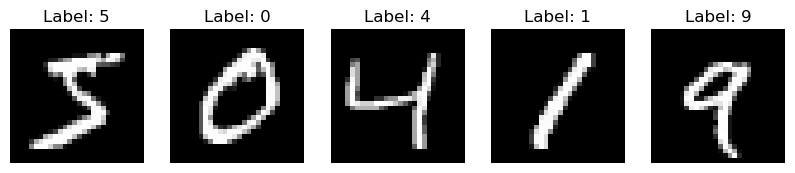

In [3]:
# Cargar algunas imágenes y sus etiquetas
fig, axes = plt.subplots(1, 5, figsize=(10, 2))  # Crear una figura con 5 imágenes

for i in range(5):
    image, label = mnist_data[i] # Tomar la imagen y la etiqueta
    axes[i].imshow(image.squeeze(), cmap='gray')  # Visualizar en escala de grises
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.show()


#### Modelo deep learning con 1 neurona

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Paso 1: Cargar y preparar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los valores de píxeles entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Paso 2: Definir el modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Aplanamos las imágenes de 28x28 a un vector de 784 dimensiones
    Dense(1, activation='relu'),         # Capa con 1 neurona, activación ReLU
    Dense(10, activation='softmax')      # Capa de salida con 10 neuronas para la clasificación
])

# Paso 3: Compilar el modelo
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',   # Pérdida para clasificación multi-clase
              metrics=['accuracy'])

# Paso 4: Entrenar el modelo
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")


Epoch 1/5


c:\Users\RAMON\miniconda3\envs\deep_learning\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.1982 - loss: 2.1124 - val_accuracy: 0.2541 - val_loss: 1.8483
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.2720 - loss: 1.8067 - val_accuracy: 0.2836 - val_loss: 1.7172
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.2896 - loss: 1.6970 - val_accuracy: 0.2868 - val_loss: 1.6683
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.2965 - loss: 1.6498 - val_accuracy: 0.3079 - val_loss: 1.6447
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.3217 - loss: 1.6303 - val_accuracy: 0.3262 - val_loss: 1.6303
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.3156 - loss: 1.6614
Precisión en el conjunto de prueba: 0.3262


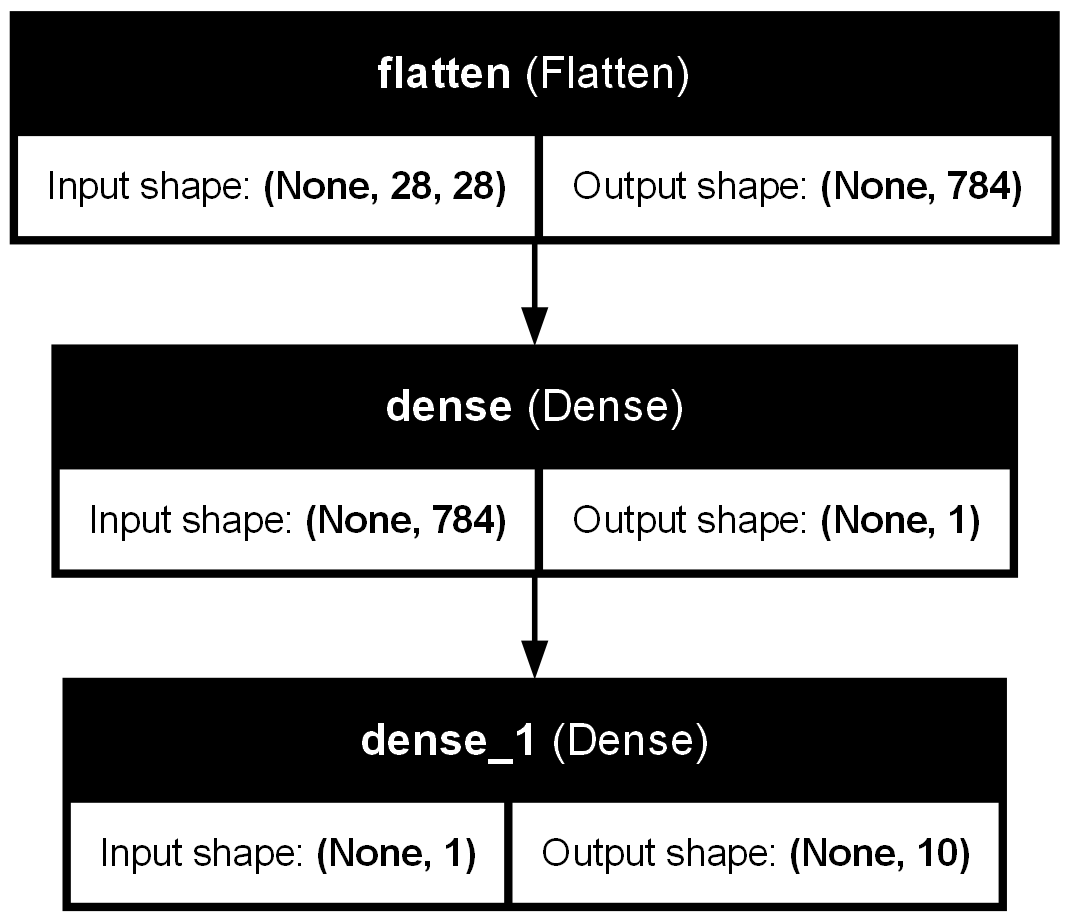

In [5]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Generar y guardar el diagrama del modelo
plot_model(model, to_file="mnist_model.png", show_shapes=True, show_layer_names=True)

# Mostrar el diagrama en Jupyter Notebook
Image(filename="mnist_model.png")